# Simulation Eval

In [1]:
%reload_ext autoreload
%autoreload 2
import os
from pathlib import Path
from cvla.hf_model_class import cVLA_wrapped
from cvla.data_loader_h5 import H5Dataset
from cvla.data_loader_paired import PairedDataset
from cvla.utils_eval import Evaluator
from cvla.utils_trajectory import DummyCamera

from IPython.display import display, HTML
from cvla.utils_vis import render_example

os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

/home/bratulic/miniforge3/envs/paligemma/lib/python3.12/site-packages/sapien/_vulkan_tricks.py:21: UserWarning: Failed to find system libvulkan. Fallback to SAPIEN builtin libvulkan.
  warn("Failed to find system libvulkan. Fallback to SAPIEN builtin libvulkan.")


In [2]:
import getpass

username = getpass.getuser()

if username == "bratulic":
    model_root = Path("/work/dlclarge2/bratulic-cvla/models/clevr-act-7-depth_img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_nexEnc_RealEval_baseline_augs_2025-04-11_15-52-11")
    model_path = model_root / "checkpoint-1750"
    model_root2 = Path("/work/dlclarge2/bratulic-cvla/models/clevr-act-7-depth_img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_NexEnc_augs_2025-04-10_16-32-05")
    model_path2 = model_root2 / "checkpoint-1200"
    model_root3 = Path("/work/dlclarge2/bratulic-cvla/models/clevr-act-7-depth_img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_nexEnc_RealEval_baseline_pc25_psim25_CameraPos_augs_2025-04-11_16-03-29")
    model_path3 = model_root3 / "checkpoint-2000"

    v14 = "cvla-clevr-camRF-sceneR-9__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_samplingAll_augs_2025-04-24_16-48-19" # 1 - 11
    #v15 = "cvla-clevr-camRF-sceneR-9__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_samplingAll_augs_warmup5_depthBoth_2025-04-25_16-46-38" # 1 - 11
    #v16 = "cvla-clevr-camRF-sceneR-9__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_samplingAll_augs_warmup5_depthOne_2025-04-25_07-51-29" # 8 - 22
    v17 = "cvla-clevr-camRF-sceneR-9__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_sortAll_augs_max20k_2025-04-27_18-00-52" # 6 - 20

    #v18 = "cvla-clevr-8__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_samplingAll_augs_warmup5_depth_2025-04-25_16-50-26" # 1k - 9k
    v19 = "cvla-clevr-8__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_samplingAll_augs_warmup5_depthBoth_2025-04-25_16-49-38" # 1k - 7k
    v20 = "cvla-clevr-8__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_sortAll_augs_max20k_2025-04-27_21-42-41" # 16 - 20
    v21 = "cvla-clevr-8__img_1_pr_interleaved_enc_xyzrotvec-cam-512xy128dmaxTokens13_lr3e-05_samplingAll_w05_maxSteps20k_2025-04-27_09-38-37" # 1 - 3

    v_depth = "mix30obj-camRF-sceneR-9_text_lr3e-05_mixObj_depth_enc128d_2025-04-29_22-05-39"
    v_text__v9 = "mix30obj-camRF-sceneR-9_text_lr3e-05_enc512_128d_normal_mix_2025-04-29_22-04-46"

    v9_no_augs = "cvla-clevr-camRF-sceneR-9_text_lr3e-05_clean_enc128d_noAugs_2025-04-29_22-09-11"
    mix_augs = "mix30obj-camRF-sceneR-9_text_lr3e-05_enc512_128d_normal_mix_2025-04-29_22-04-46"
    mix_depth_augs = "mix30obj-camRF-sceneR-9_text_lr3e-05_mixObj_depth_enc128d_2025-04-29_22-05-39"
    mix_no_augs = "mix30obj-camRF-sceneR-9_text_lr3e-05_mixObj_enc128d_noAugs_2025-04-29_22-07-13"
    v9_augs = "_text_lr3e-05_enc512_128d_normal_2025-04-29_19-18-16"
    v9_depth_augs = "_text_lr3e-05_enc512_128d_depth_2025-04-29_10-38-15"

    model_path = Path("/work/dlclarge2/bratulic-cvla/models/") / mix_no_augs / "checkpoint-4687"
    # model_path = Path("/work/dlclarge2/bratulic-cvla/models/") / v20 / "checkpoint-16000"
    dataset_for_simulation = "objaverse"

elif username == "argusm":
    model_location = Path("/data/lmbraid19/argusm/models/")
    #run = "_text_lr3e-05xyzrotvec-cam-1024xy_2025-04-23_11-04-12"
    #run = "_text_lr3e-05xyzrotvec-cam-256xy_2025-04-23_11-04-12"
    #run = "_text_lr3e-05xyzrotvec-cam-128xy_2025-04-23_11-04-12"
    #run = "_text_lr3e-05xyzrotvec-cam-512xy256d_2025-04-23_12-03-48"
    #run = "_text_lr3e-05xyzrotvec-cam-512xy_2025-04-23_11-04-16"
    run = "_text_lr3e-05xyzrotvec-rbt-256_2025-04-27_15-55-37"
    #run = "_text_lr3e-05_enc512_128d_depth_2025-04-29_10-38-15"
    #run = "_text_lr3e-05_enc512_256d_depth_2025-04-29_10-38-26"
    model_path = model_location / run / "checkpoint-4687"

model_wrapped = cVLA_wrapped(model_path=model_path)

Using device: cuda
loaded processor.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
conditioning = model_wrapped.conditioning

if conditioning == "trajectory":
    # simulation clevr dataset for testing
    
    if "cvla-clevr-8" in str(model_path):
        if dataset_for_simulation == "objaverse":
            dataset_location = Path("/tmp/cvla-obja-8")
        else:
            dataset_location = Path("/tmp/cvla-clevr-8-valid")
    else:
        if dataset_for_simulation == "objaverse":
            dataset_location = Path("/tmp/cvla-obja-camRF-sceneR-9")
        else:
            dataset_location = Path("/tmp/cvla-clevr-camRF-sceneR-9-valid")
        
    num_images_in_context = 1
    image_order = "interleaved"
    action_encoder = model_wrapped.enc_model.NAME
    raw_dataset = H5Dataset(dataset_location, action_encoder=action_encoder)
    run_name = f"_img_{num_images_in_context}_pr_{image_order}_enc_{action_encoder}"
    load_presampled_pairs_path = Path("/data/lmbraid21/bratulic/max_pali/datasets") / f"{dataset_location.name}_{run_name}_new.pkl"
    presampled_eval_sequences_path = Path("/data/lmbraid21/bratulic/max_pali/datasets") / f"{dataset_location.name}_{run_name}_pCopy0_pSorting0_presampled_eval_sequences.pkl"
    demonstration_dataset = PairedDataset(raw_dataset, num_images_in_context=num_images_in_context, image_order=image_order, load_presampled_pairs_path=load_presampled_pairs_path, plot_statistics=False,
                                p_copy=0.0, p_sort_by_l2_distance=0.0, presampled_path=presampled_eval_sequences_path, mode="test", sort_criteria="trajectory_shape")
    model_wrapped.set_conditioning_dataset(demonstration_dataset)
    dummy_camera = raw_dataset[0][1]["camera"]
    evaluator = Evaluator(model_wrapped.enc_model, dummy_camera)
else:
    dummy_camera = None
    evaluator = None

In [4]:
import random
from mani_skill.examples.run_env import Args, iterate_env

parsed_args = Args()
parsed_args.env_id = "ClevrMove-v1"
parsed_args.render_mode = "rgb_array"
parsed_args.control_mode = "pd_joint_pos"
parsed_args.camera_views = "random_side"
if conditioning == "trajectory":
    if "cvla-clevr-8" in str(model_path):           # models trained on  clevr-8 should be evaluated on clevr-8
        parsed_args.camera_views = "random_side"
    else:
        parsed_args.camera_views = "random_fov"
parsed_args.quiet = True
# parsed_args.verbose = True
parsed_args.action_encoder = model_wrapped.enc_model.NAME
if dataset_for_simulation == "objaverse":
    parsed_args.object_dataset = "objaverse"
parsed_args.camera_views = "random_fov"
#parsed_args.camera_views = "random_side"

inital_seed = 2919129908
random.seed(inital_seed)
# seeds = random.sample(range(0, 2**32), 50)
# seeds = [2483769646, 180881011, 1809414673, 2883964906, 2170643191, 410500918, 113132070, 3039723796, 14679104, 4279916714, 278991674, 2068020916, 1390357157, 136660899, 3389664825, 2122880614, 1754234965, 3251517866, 1804115595, 1896735568, 412577358, 3372035194, 3506966281, 1703612206, 1768282717, 163537772, 1757877314, 3983804540, 898228096, 2136500906, 2893004833, 1768225131, 1911062959, 2485475605, 2098807074, 1885505790, 3805662650, 3042381630, 2425464850, 2880204856, 322760020, 3904393488, 158321225, 2365191068, 3074121908, 3253628556, 1867392794, 3730714662, 1819615428, 1411403658]
#seeds = [3680886782, 2802635797, 1744512938, 906024569, 1774913893, 2377609938, 2521992606, 172158870, 3004869866, 4226300858, 461653925, 4272151674, 3431745312, 4163708684, 433261562, 885494537, 1098313621, 3217143194, 1031015365, 3395575244, 611105443, 1354071940, 3526388904, 2733645272, 4205874205, 637479328, 1545077070, 2986609316, 658166141, 3537072223, 2232379151, 2612341839, 3437475515, 2554168161, 2177061165, 2160980320, 621132837, 2114964714, 1214631459, 2807144221, 3951810957, 2673307057, 4089274424, 3191539656, 2795800822, 2430345196, 2766575575, 3315258658, 3535103128, 1546654198]
#seeds= seeds[::-1]
# seeds_which_we_wanted_to_use = [2603274749, 915639755, 906024569, 1774913893, 3507534935, 2377609938, 1172049423, 2521992606, 2908100739, 735227406, 172158870, 3646343934, 1088293768, 3004869866, 461653925, 2025933929, 4067874083, 4272151674, 2804080466, 3431745312, 78493986, 3264936548, 4163708684, 433261562, 3808171021, 2068926005, 192656676, 1277534805, 3789057177, 2311723683, 733087580, 4033777556, 2756919050, 3630234651, 3217143194, 1031015365, 3395575244, 2182389079, 2023326672, 79260630, 1354071940, 874206699, 1654640856, 499702150, 2481944716, 3766393311, 3259409938, 2448613074, 3536953574, 80174443]
# seeds_clevr_easy = [2603274749, 915639755, 906024569, 1774913893, 3507534935, 2377609938, 1172049423, 2521992606, 2908100739, 735227406, 172158870, 3646343934, 1088293768, 3004869866, 461653925, 2025933929, 4067874083, 4272151674, 2804080466, 3431745312, 78493986, 3264936548, 4163708684, 433261562, 3808171021, 2068926005, 192656676, 1277534805, 3789057177, 2311723683, 733087580, 4033777556, 2756919050, 3630234651, 3217143194, 1031015365, 3395575244, 2182389079, 2023326672, 79260630, 1354071940, 874206699, 1654640856, 499702150, 2481944716, 3766393311, 3259409938, 2448613074, 3536953574, 80174443]
# seeds_clevr_hard = [3680886782, 2802635797, 1744512938, 906024569, 1774913893, 2377609938, 2521992606, 172158870, 3004869866, 4226300858, 461653925, 4272151674, 3431745312, 4163708684, 433261562, 885494537, 1098313621, 3217143194, 1031015365, 3395575244, 611105443, 1354071940, 3526388904, 2733645272, 4205874205, 637479328, 1545077070, 2986609316, 658166141, 3537072223, 2232379151, 2612341839, 3437475515, 2554168161, 2177061165, 2160980320, 621132837, 2114964714, 1214631459, 2807144221, 3951810957, 2673307057, 4089274424, 3191539656, 2795800822, 2430345196, 2766575575, 3315258658, 3535103128, 1546654198]
# seeds_objaverse_hard = [1744512938, 2040171868, 603086955, 3114880260, 3453814866, 172158870, 3019050896, 2378207958, 2025933929, 1813581491, 4188321457, 2280014332, 1657617285, 3431745312, 529160525, 4163708684, 2068926005, 192656676, 321034068, 3271584471, 2866478656, 1873976920, 3630234651, 3395575244, 3259409938, 80174443, 4087160184, 2764883367, 3526388904, 1295418175, 517974533, 2532402590, 637479328, 1545077070, 1952321516, 2587484500, 3509369673, 2232379151, 2271163404, 3437475515, 1557090118, 1698846319, 2160980320, 1405630495, 3903676068, 880379348, 1892007745, 2807144221, 4089274424, 86050299]
# seeds_objaverse_easy = [915639755, 2802635797, 1744512938, 2040171868, 1426307309, 1774913893, 1136780770, 3507534935, 4122684191, 3114880260, 1172049423, 3271910715, 3453814866, 735227406, 172158870, 746503233, 1088293768, 3019050896, 2378207958, 4226300858, 3868130567, 1813581491, 4067874083, 4188321457, 4272151674, 2280014332, 1657617285, 3431745312, 529160525, 3264936548, 4163708684, 2068926005, 192656676, 321034068, 3271584471, 1277534805, 733087580, 4033777556, 2866478656, 3630234651, 3395575244, 79260630, 1354071940, 874206699, 499702150, 2481944716, 3766393311, 3259409938, 2448613074, 80174443]

#parsed_args.seed = seeds

env_iter = iterate_env(parsed_args, vis=False, model=model_wrapped)

# print all args
print(parsed_args)

Args(env_id='ClevrMove-v1', obs_mode='rgb+depth+segmentation', sim_backend='auto', reward_mode=None, num_envs=1, control_mode='pd_joint_pos', render_mode='rgb_array', shader='default', record_dir=None, pause=False, quiet=True, seed=None, run_mode='script', robot_uids='panda', scene_dataset='Table', scene_options='fixed', object_dataset='objaverse', camera_views='random_fov', action_encoder='xyzrotvec-cam-512xy128d', N_samples=50)


In [5]:
%xmode verbose
iters_reached = 0
num_iters = 250
reward_succes = 0
visualize_success = True
visualized_imgs = ""
good_seeds = []
for i in range(num_iters):
    try:
        output = next(env_iter)
    except (ValueError, AssertionError) as e:
        print(f"Encountered error {e.__class__.__name__}")
        print(e)
        print(f"Skipping iteration {i}")
        continue
    
    generated_depth, generated_image = output[0]
    json_dict = output[1]
    tmp_seed = output[2]
    
    print(f"TRY {i:<2} Prefix: {json_dict['prefix']:<100} -> {json_dict['reward']:.2f}")
    if evaluator:
        evaluator.evaluate(json_dict["prediction"], json_dict["suffix"])
    iters_reached = json_dict["iter_reached"]
    good_seeds.append(json_dict["seed"])
    if json_dict["reward"] > 0.75:
        if visualize_success:
            # print(f"suffix: {json_dict['suffix']} -> prediction: {json_dict['prediction']}")
            width, height, _ = generated_image.shape
            camera = DummyCamera(json_dict["camera_intrinsic"], json_dict["camera_extrinsic"], width, height)
            visualized_imgs += render_example(generated_image.detach().cpu().numpy(), json_dict["suffix"], json_dict["prediction"], camera=camera, 
                                              enc_pred=model_wrapped.enc_model, enc=model_wrapped.enc_model, extra_text=f"TRY: {i} - Reward: {json_dict["reward"]:.2f}",
                                              text=json_dict["prefix"])
        reward_succes += 1
    else:
        if i % 5 == 0:
            width, height, _ = generated_image.shape
            camera = DummyCamera(json_dict["camera_intrinsic"], json_dict["camera_extrinsic"], width, height)
            visualized_imgs += render_example(generated_image.detach().cpu().numpy(), json_dict["suffix"], json_dict["prediction"], camera=camera, 
                                              enc_pred=model_wrapped.enc_model, enc=model_wrapped.enc_model, extra_text=f"TRY: {i} - Reward: {json_dict["reward"]:.2f}",
                                              text=json_dict["prefix"])
    
if evaluator:
    stats = evaluator.report_stats()
    for metric_name, metric_value in stats.items():
        print(f"{metric_name}: {metric_value:.3f}")
    evaluator.reset()

iters_reached += 1  # starts with 0 so we add 1 to it

print(f"\nTotal number of tries {iters_reached} for {num_iters} tries gaves {100*num_iters / iters_reached:.2f}% valid sequence rate.")
print(f"Reward success rate: {100*reward_succes / num_iters:.2f}% for model {model_path} with {conditioning} conditioning.")
print(f"Good seeds: {good_seeds}")

Exception reporting mode: Verbose
ChatGPT describer not loaded
Trimesh, msgpack, PIL, not installed, please install it using `pip install trimesh msgpack pillow` if you would want to convert Spok objects to .glb
filter visible objects True
action encoder xyzrotvec-cam-512xy128d


[W512 11:33:11.368133340 NNPACK.cpp:62] Could not initialize NNPACK! Reason: Unsupported hardware.


TRY 0  Prefix: move pink fish sushi onto ornate box <loc0167><loc0392><loc0763><seg057><seg047><seg010>             -> 0.00
TRY 1  Prefix: move realistic peanut shell onto polygonal red can <loc0219><loc0427><loc0762><seg051><seg076><seg089> -> 0.20
TRY 2  Prefix: move human larynx model onto realistic brown toad <loc0208><loc0218><loc0759><seg051><seg058><seg048> -> 0.92
screw plan failed
TRY 3  Prefix: move golden seashell ornament onto decorative mammoth model <loc0247><loc0417><loc0764><seg043><seg063><seg060> -> 0.00
TRY 4  Prefix: move voxel character onto golden bottle <loc0234><loc0422><loc0763><seg043><seg063><seg059>          -> 0.00
TRY 5  Prefix: move brown loafers onto cube with knobs <loc0333><loc0274><loc0756><seg054><seg085><seg103>          -> 0.64
TRY 6  Prefix: move blue patterned bowl onto red ball <loc0339><loc0244><loc0734><seg040><seg071><seg076>           -> 0.00
TRY 7  Prefix: move orange book onto plastic bottle <loc0273><loc0156><loc0761><seg054><seg087><seg1

In [ ]:
seeds_clevr_easy_50 = [2603274749, 915639755, 906024569, 1774913893, 3507534935, 2377609938, 1172049423, 2521992606, 2908100739, 735227406, 172158870, 3646343934, 1088293768, 3004869866, 461653925, 2025933929, 4067874083, 4272151674, 2804080466, 3431745312, 78493986, 3264936548, 4163708684, 433261562, 3808171021, 2068926005, 192656676, 1277534805, 3789057177, 2311723683, 733087580, 4033777556, 2756919050, 3630234651, 3217143194, 1031015365, 3395575244, 2182389079, 2023326672, 79260630, 1354071940, 874206699, 1654640856, 499702150, 2481944716, 3766393311, 3259409938, 2448613074, 3536953574, 80174443]
seeds_clevr_hard_50 = [3680886782, 2802635797, 1744512938, 906024569, 1774913893, 2377609938, 2521992606, 172158870, 3004869866, 4226300858, 461653925, 4272151674, 3431745312, 4163708684, 433261562, 885494537, 1098313621, 3217143194, 1031015365, 3395575244, 611105443, 1354071940, 3526388904, 2733645272, 4205874205, 637479328, 1545077070, 2986609316, 658166141, 3537072223, 2232379151, 2612341839, 3437475515, 2554168161, 2177061165, 2160980320, 621132837, 2114964714, 1214631459, 2807144221, 3951810957, 2673307057, 4089274424, 3191539656, 2795800822, 2430345196, 2766575575, 3315258658, 3535103128, 1546654198]
seeds_objaverse_hard_50 = [1744512938, 2040171868, 603086955, 3114880260, 3453814866, 172158870, 3019050896, 2378207958, 2025933929, 1813581491, 4188321457, 2280014332, 1657617285, 3431745312, 529160525, 4163708684, 2068926005, 192656676, 321034068, 3271584471, 2866478656, 1873976920, 3630234651, 3395575244, 3259409938, 80174443, 4087160184, 2764883367, 3526388904, 1295418175, 517974533, 2532402590, 637479328, 1545077070, 1952321516, 2587484500, 3509369673, 2232379151, 2271163404, 3437475515, 1557090118, 1698846319, 2160980320, 1405630495, 3903676068, 880379348, 1892007745, 2807144221, 4089274424, 86050299]
seeds_objaverse_easy_50 = [915639755, 2802635797, 1744512938, 2040171868, 1426307309, 1774913893, 1136780770, 3507534935, 4122684191, 3114880260, 1172049423, 3271910715, 3453814866, 735227406, 172158870, 746503233, 1088293768, 3019050896, 2378207958, 4226300858, 3868130567, 1813581491, 4067874083, 4188321457, 4272151674, 2280014332, 1657617285, 3431745312, 529160525, 3264936548, 4163708684, 2068926005, 192656676, 321034068, 3271584471, 1277534805, 733087580, 4033777556, 2866478656, 3630234651, 3395575244, 79260630, 1354071940, 874206699, 499702150, 2481944716, 3766393311, 3259409938, 2448613074, 80174443]

seeds_objaverse_easy = [915639755, 2802635797, 1744512938, 2040171868, 1426307309, 1774913893, 1136780770, 3507534935, 4122684191, 3114880260, 1172049423, 3271910715, 3453814866, 735227406, 172158870, 746503233, 1088293768, 3019050896, 2378207958, 4226300858, 3868130567, 1813581491, 4067874083, 4188321457, 4272151674, 2280014332, 1657617285, 3431745312, 529160525, 3264936548, 4163708684, 2068926005, 192656676, 321034068, 3271584471, 1277534805, 733087580, 4033777556, 2866478656, 3630234651, 3395575244, 79260630, 1354071940, 874206699, 499702150, 2481944716, 3766393311, 3259409938, 2448613074, 80174443, 4087160184, 1417270689, 2764883367, 3526388904, 91860452, 3835755247, 1295418175, 422291714, 517974533, 2532402590, 4193952058, 1545077070, 2108871309, 2216594104, 1952321516, 2986609316, 2587484500, 3509369673, 658166141, 3537072223, 2232379151, 2271163404, 3437475515, 2554168161, 2177061165, 1698846319, 2160980320, 1405630495, 1134777607, 3903676068, 2114964714, 880379348, 3731157486, 1892007745, 736062039, 2807144221, 3951810957, 4089274424, 2795800822, 86050299, 2766575575, 3270628412, 1977278432, 3315258658, 3364530370, 3273855431, 1502638877, 1519891782, 526520938, 3535103128, 988174366, 4244450492, 3098449777, 3998915133, 1446328196, 2077609272, 3670751890, 1637029413, 3400304208, 73237359, 2705111285, 1369024863, 3680322809, 4098629731, 2059077229, 3666185719, 1609772523, 964590279, 4029542333, 2169020228, 84107025, 1656118576, 1630161414, 87454936, 4178058369, 3674077824, 2380472908, 1655574748, 3739753431, 2451528178, 1397264776, 3921385533, 862704524, 1520819697, 2658314375, 3725734550, 1394222184, 875433493, 1287833270, 3283589344, 2132817302, 3611288770, 180881011, 1490696070, 2434988439, 1124294860, 926859777, 937923689, 2883964906, 410500918, 1292640760, 113132070, 1097810371, 3039723796, 3237197866, 14679104, 4279916714, 278991674, 3743274572, 136660899, 829688383, 1350322728, 971425815, 2399375446, 3389664825, 2122880614, 1754234965, 2576220809, 1896735568, 693198184, 412577358, 844106427, 487536884, 990419874, 1768282717, 163537772, 1757877314, 3156937422, 898228096, 3500471796, 2806158791, 1169844202, 2893004833, 1768225131, 2793481514, 2098807074, 1885505790, 3805662650, 1457524479, 2425464850, 2536049440, 2880204856, 4238804537, 322760020, 3904393488, 2451226180, 3282225947, 1660021905, 3253628556, 850642649, 2295934963, 3523074427, 3730714662, 605978479, 1819615428, 2764116070, 622825101, 1411403658, 50538578, 1663762609, 1524371290, 1936927061, 1748234018, 874835594, 3248791007, 3231514637, 3309302466, 2640537904, 3477784267, 599063466, 2140489621, 1310773977, 1800136412, 3453062325, 464532259, 3470177567, 1034831155, 3939266399, 1056519846, 3489624216, 1311184519, 2970390600, 37484697, 4264475535, 938213331, 4207407346, 3893435155, 1397347340, 410027214, 3832959828, 2347055186, 3787783058, 4272934799, 2566267809, 2211002086, 3340556848, 3974484705, 998420743, 3391189070, 2180134041]
seeds_objaverse_hard = []
seeds_clevr_easy = []
seeds_clevr_hard = []

if parsed_args.camera_views == "random_fov" and dataset_for_simulation == "objaverse":
    seeds_to_eval = seeds_objaverse_hard
elif parsed_args.camera_views == "random_side" and dataset_for_simulation == "objaverse":
    seeds_to_eval = seeds_objaverse_easy
elif parsed_args.camera_views == "random_fov" and dataset_for_simulation != "objaverse":
    seeds_to_eval = seeds_clevr_hard
elif parsed_args.camera_views == "random_side" and dataset_for_simulation != "objaverse":
    seeds_to_eval = seeds_clevr_easy
else:
    raise ValueError("Unknown camera view or dataset for simulation.")


for g_seed in good_seeds:
    if g_seed not in seeds_to_eval:
        print(f"Seed {g_seed} is NOT in the hard set.")

for orig_seeds in seeds_to_eval:
    if orig_seeds not in good_seeds:
        print(f"Seed {orig_seeds} is NOT in the good seeds.")


Seed 4087160184 is NOT in the hard set.
Seed 1417270689 is NOT in the hard set.
Seed 2764883367 is NOT in the hard set.
Seed 3526388904 is NOT in the hard set.
Seed 91860452 is NOT in the hard set.
Seed 3835755247 is NOT in the hard set.
Seed 1295418175 is NOT in the hard set.
Seed 422291714 is NOT in the hard set.
Seed 517974533 is NOT in the hard set.
Seed 2532402590 is NOT in the hard set.
Seed 4193952058 is NOT in the hard set.
Seed 1545077070 is NOT in the hard set.
Seed 2108871309 is NOT in the hard set.
Seed 2216594104 is NOT in the hard set.
Seed 1952321516 is NOT in the hard set.
Seed 2986609316 is NOT in the hard set.
Seed 2587484500 is NOT in the hard set.
Seed 3509369673 is NOT in the hard set.
Seed 658166141 is NOT in the hard set.
Seed 3537072223 is NOT in the hard set.
Seed 2232379151 is NOT in the hard set.
Seed 2271163404 is NOT in the hard set.
Seed 3437475515 is NOT in the hard set.
Seed 2554168161 is NOT in the hard set.
Seed 2177061165 is NOT in the hard set.
Seed 


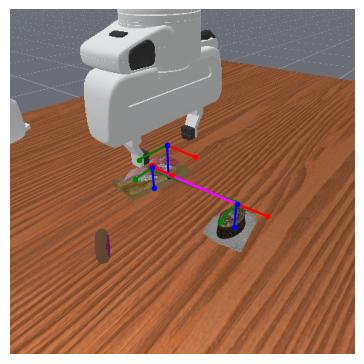
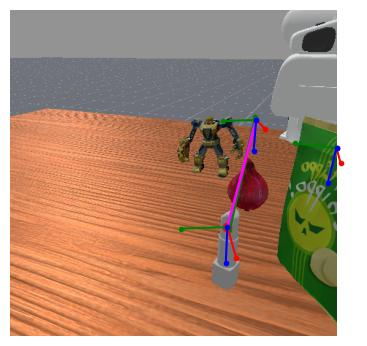
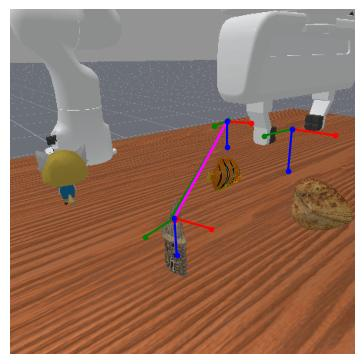
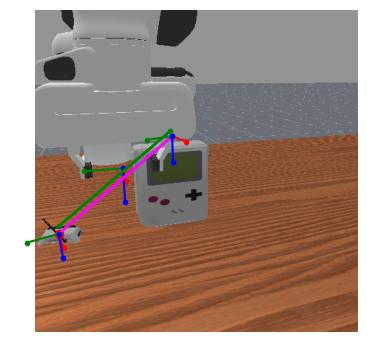
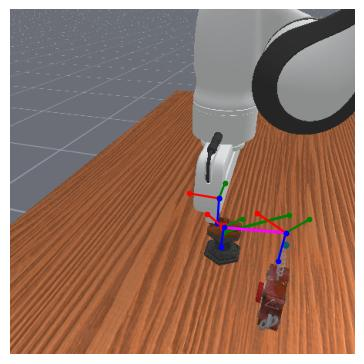
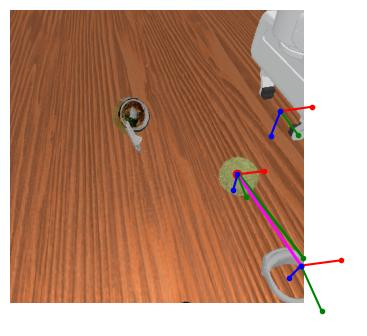
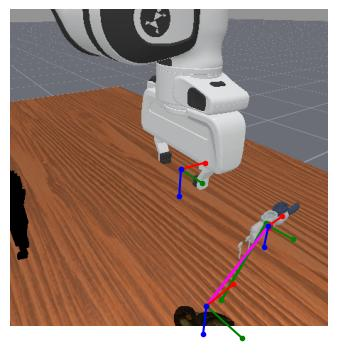
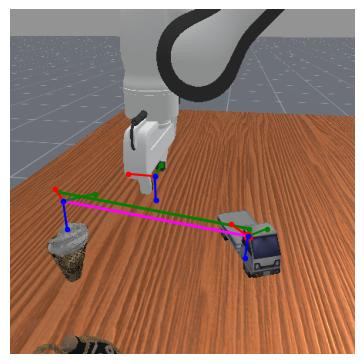
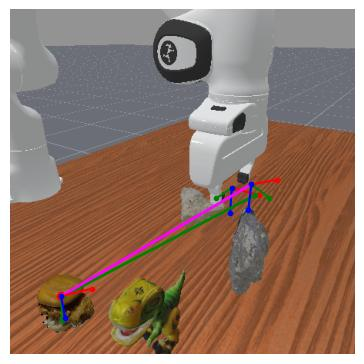
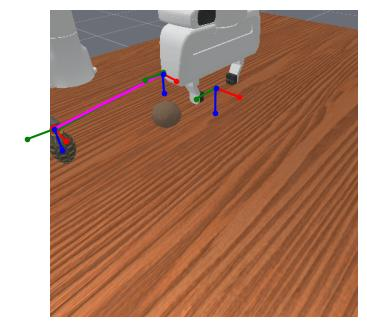
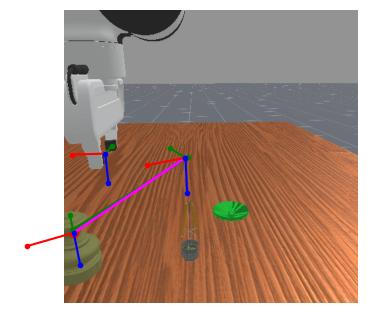
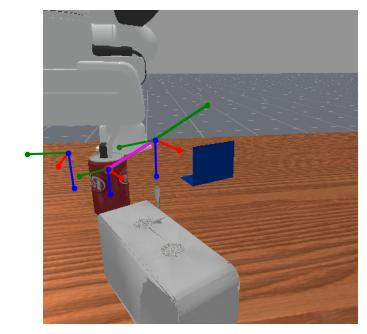
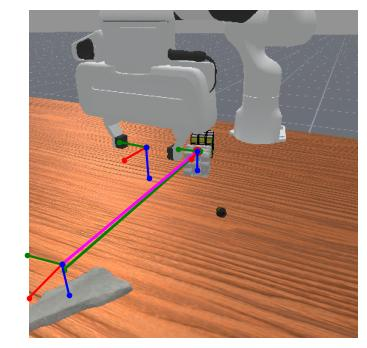
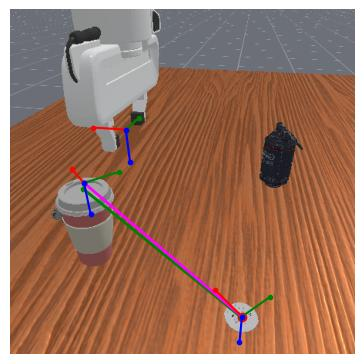
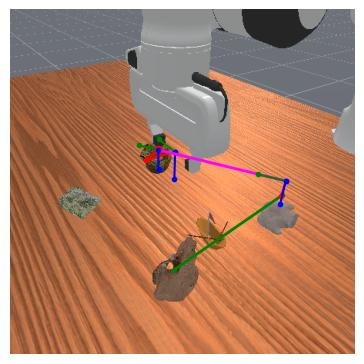
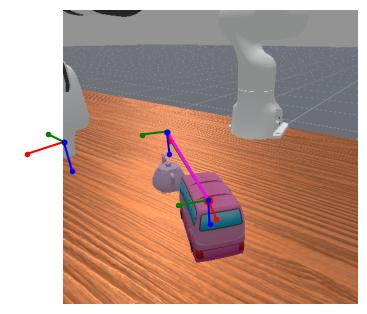
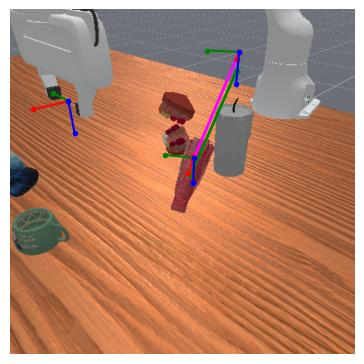
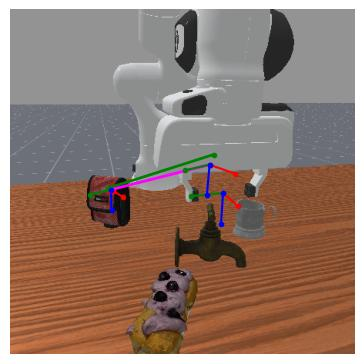
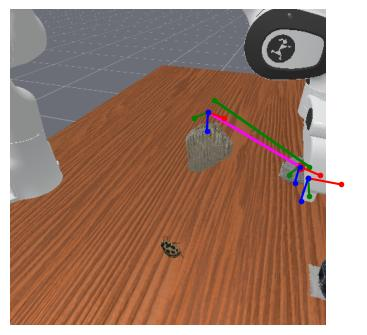
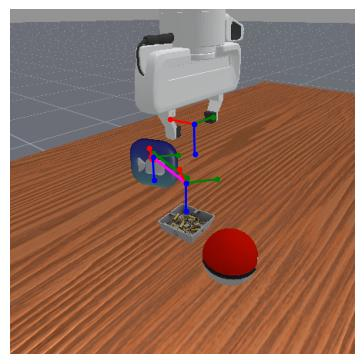
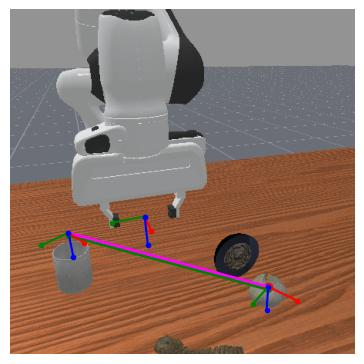
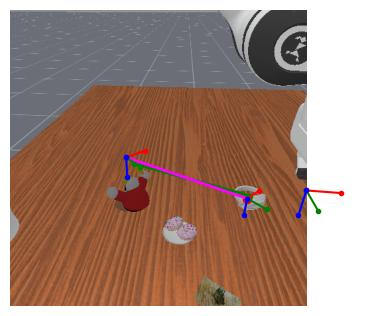
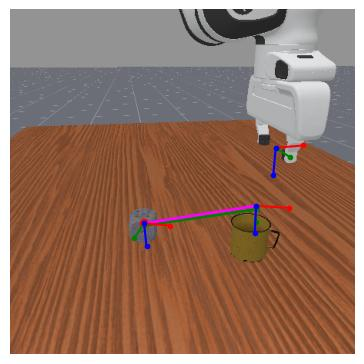
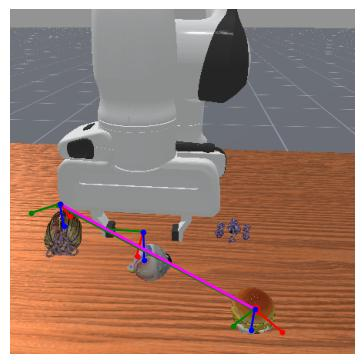
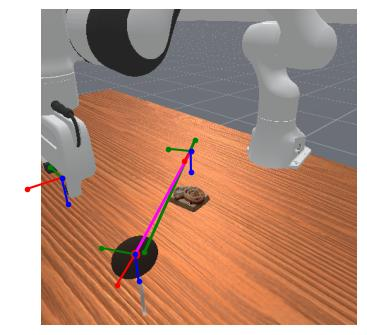
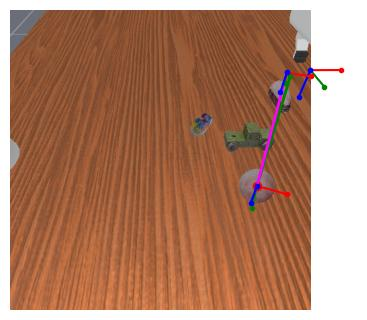
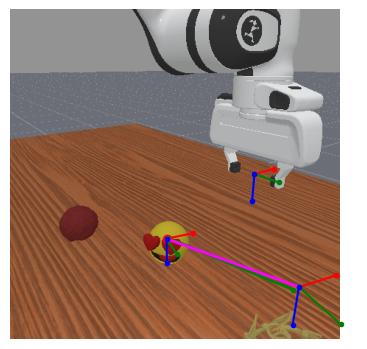
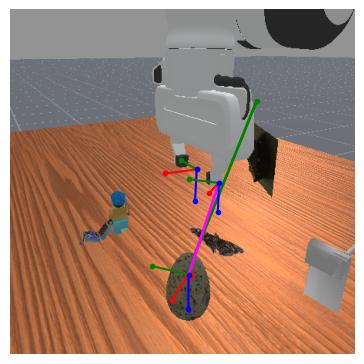
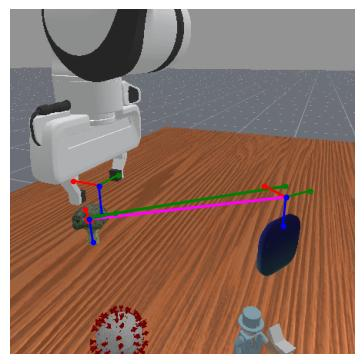
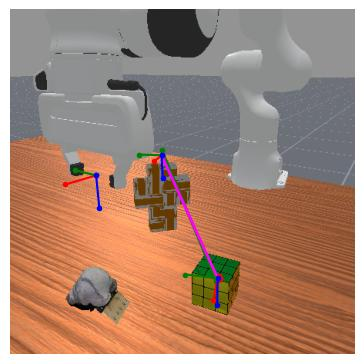
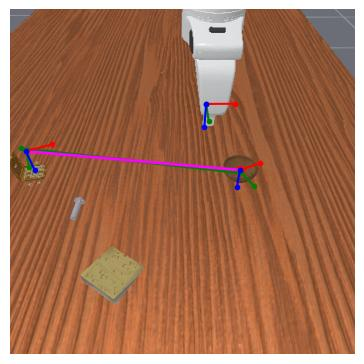
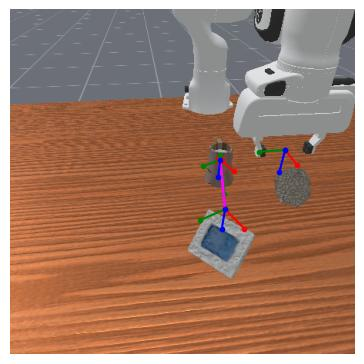
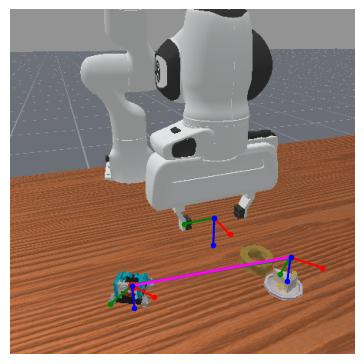
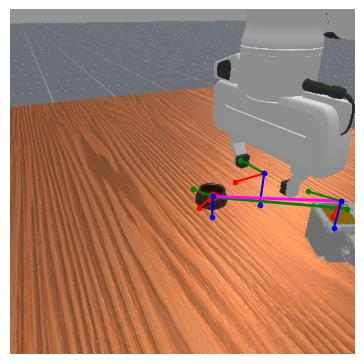
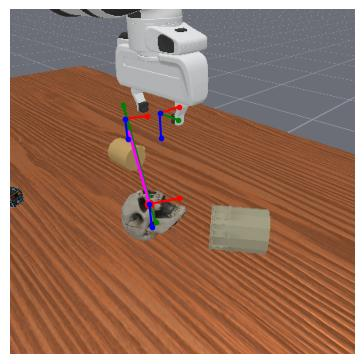
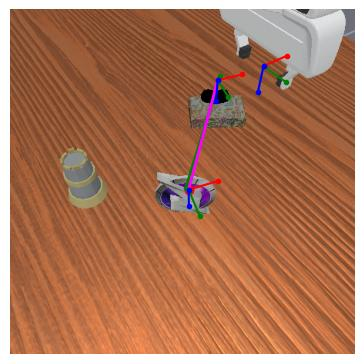
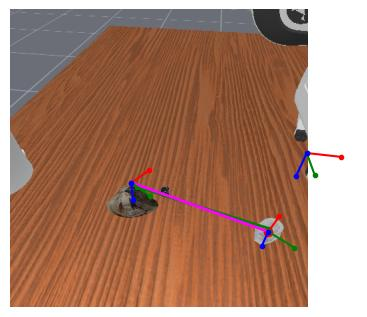
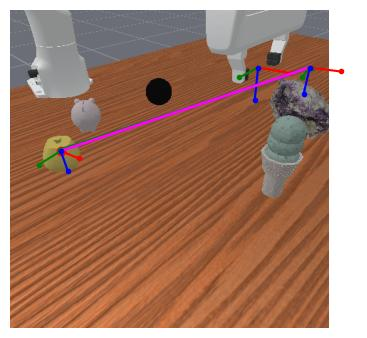
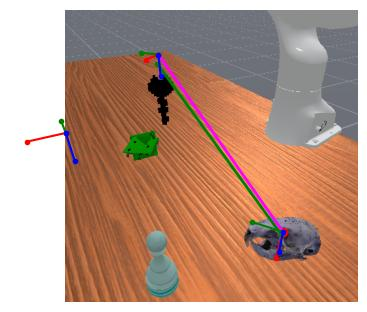
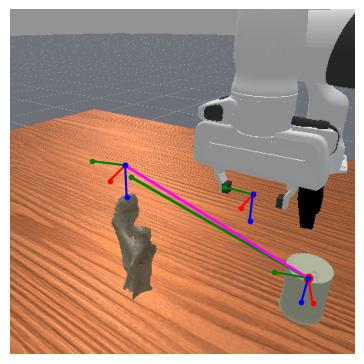
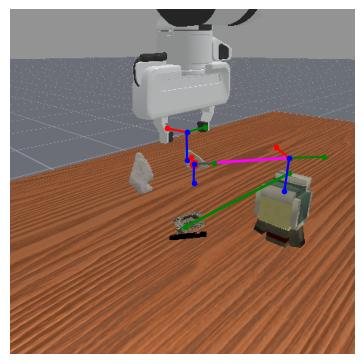
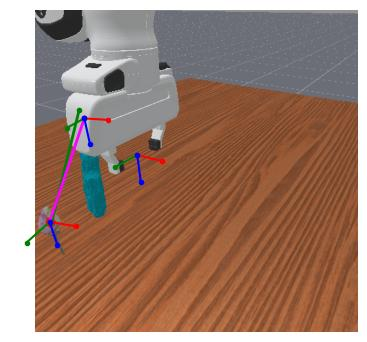
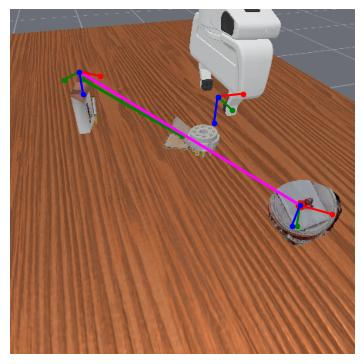
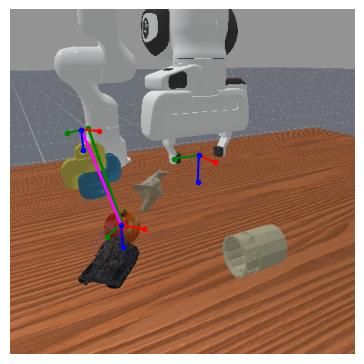
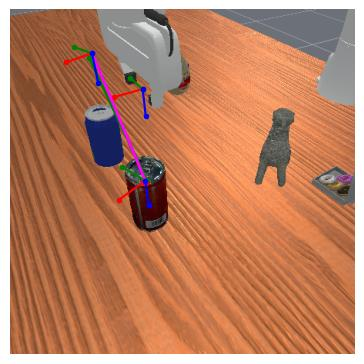
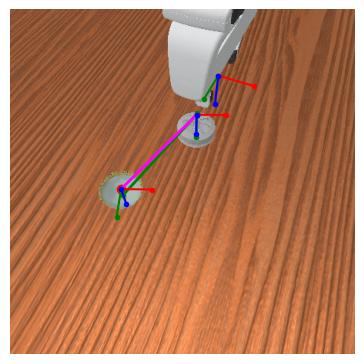
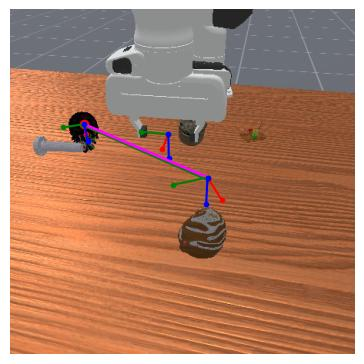
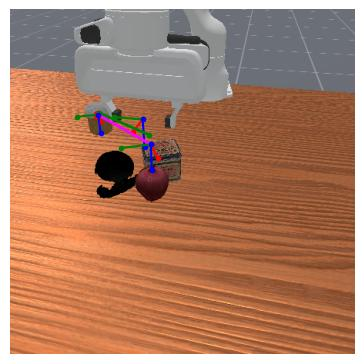
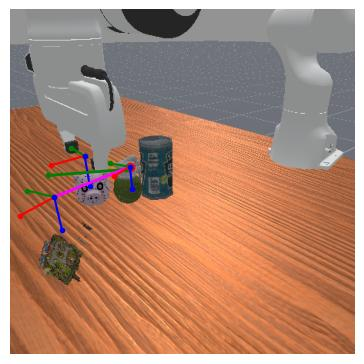
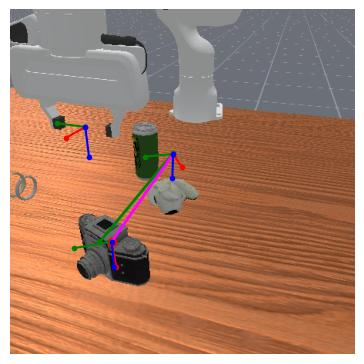
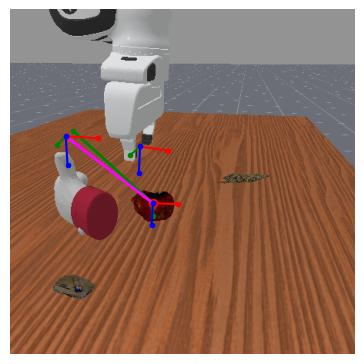
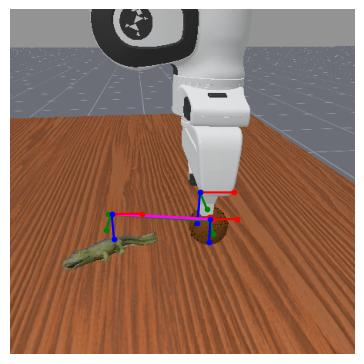
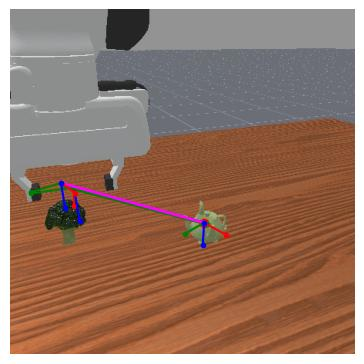
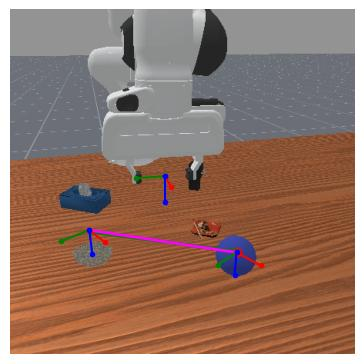
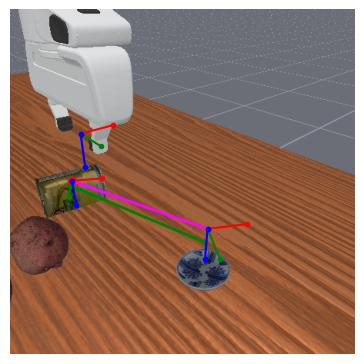
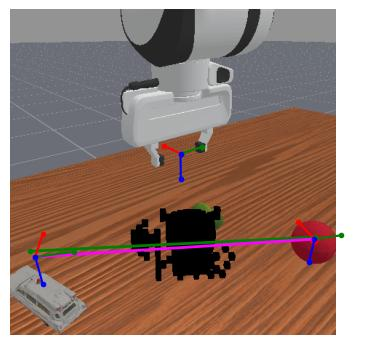
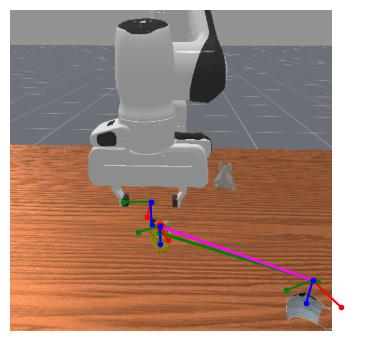
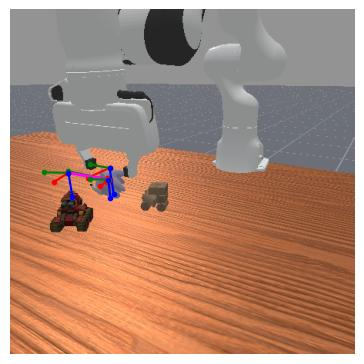
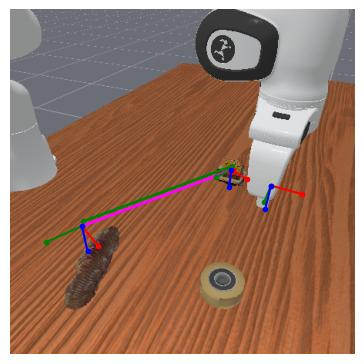
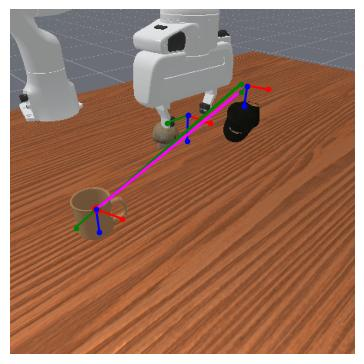
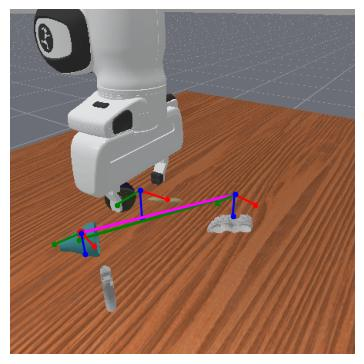
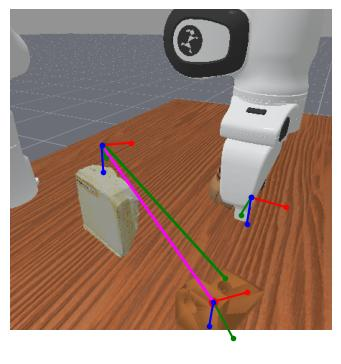
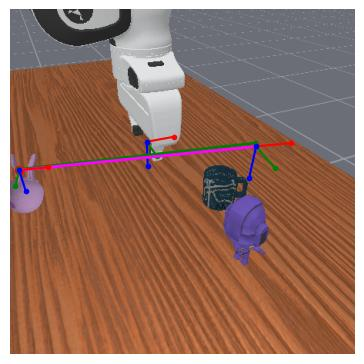
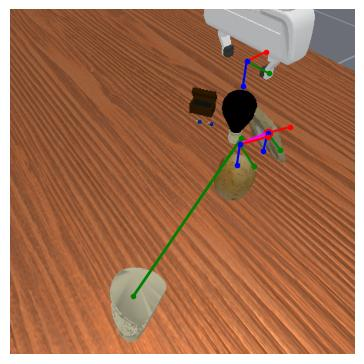
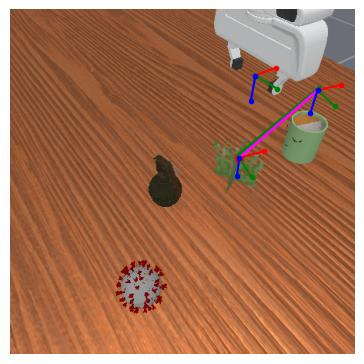
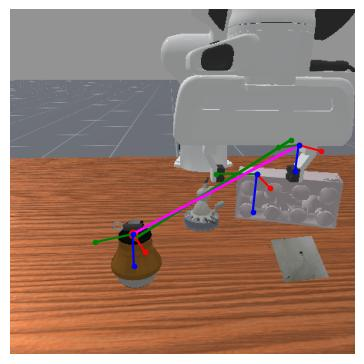
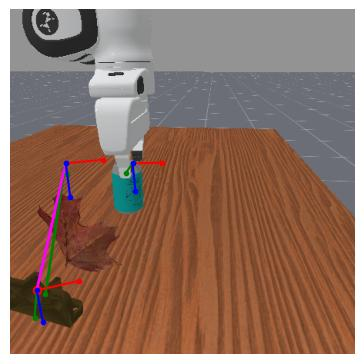
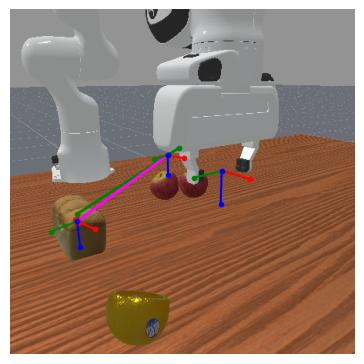
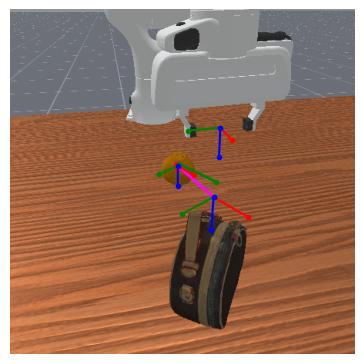
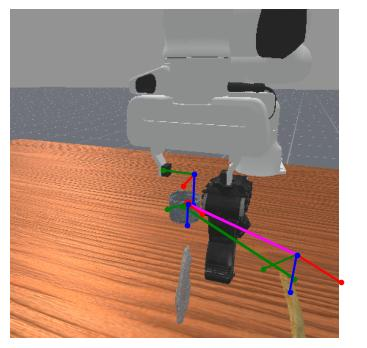
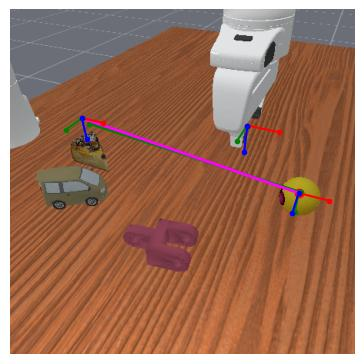
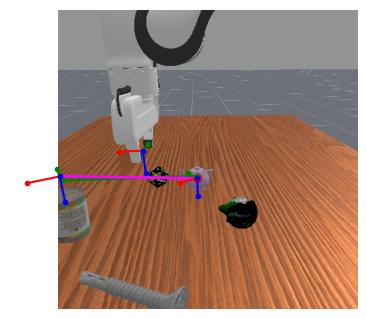
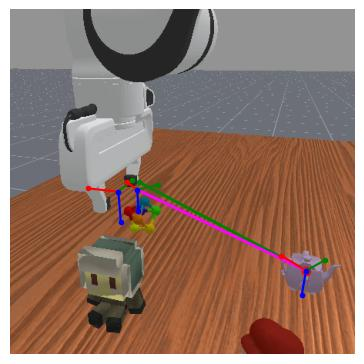
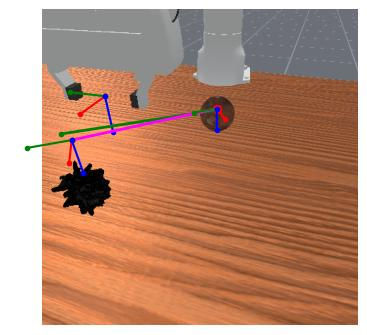
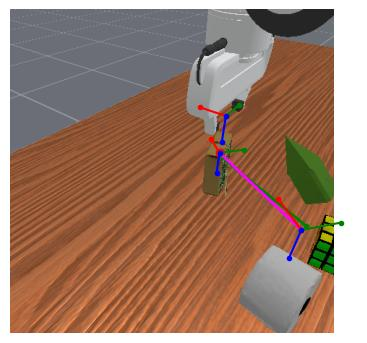
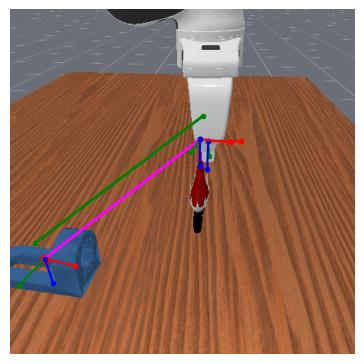
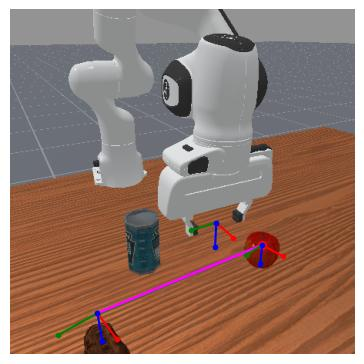
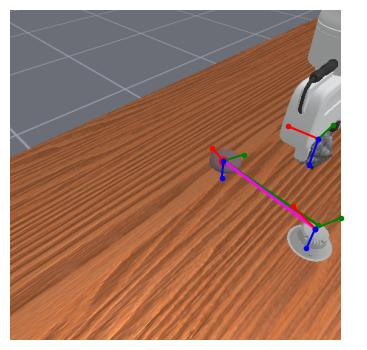
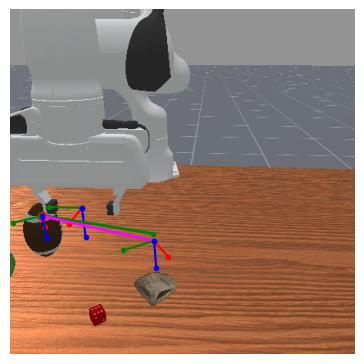
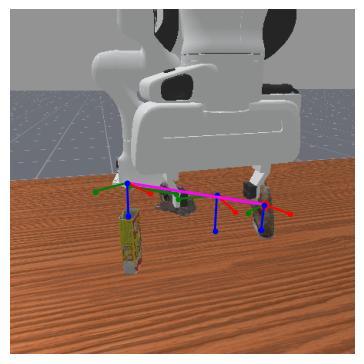
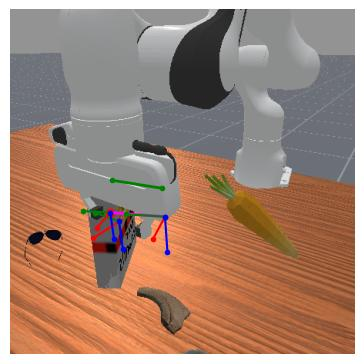
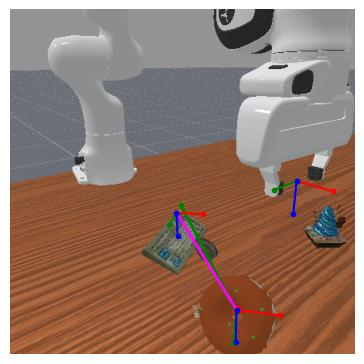
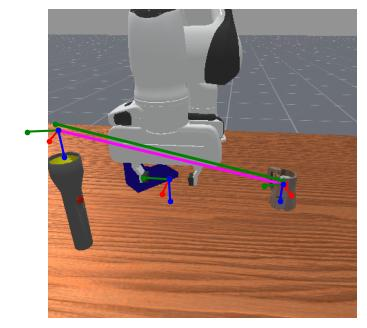
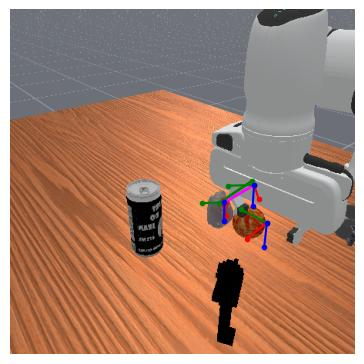
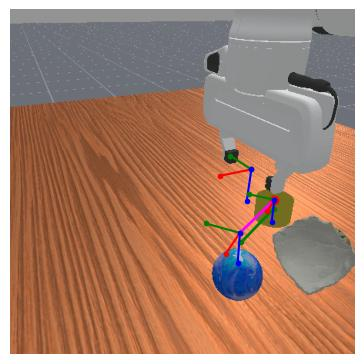
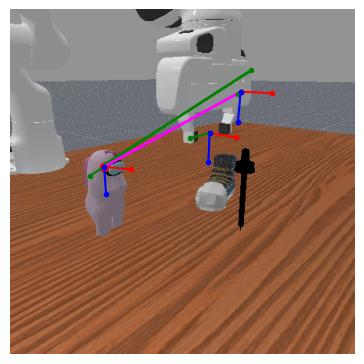
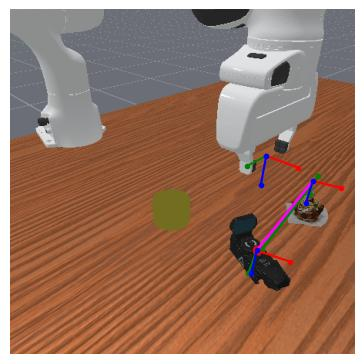
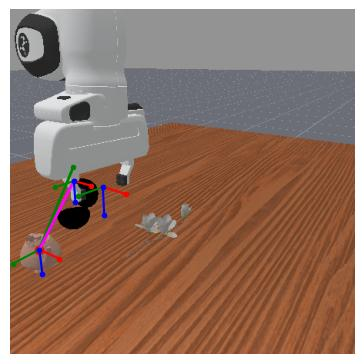
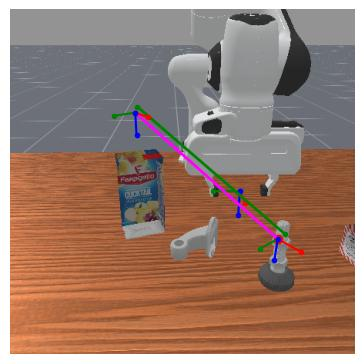
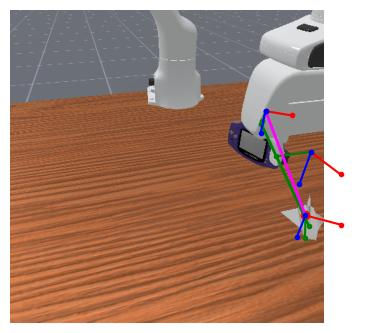
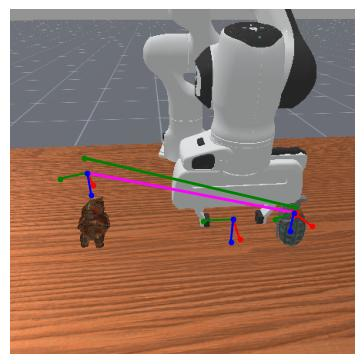
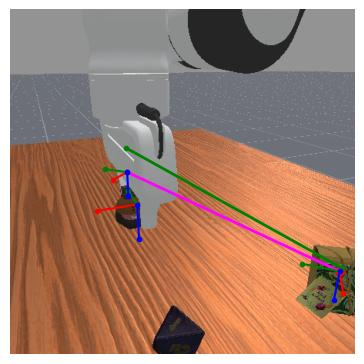
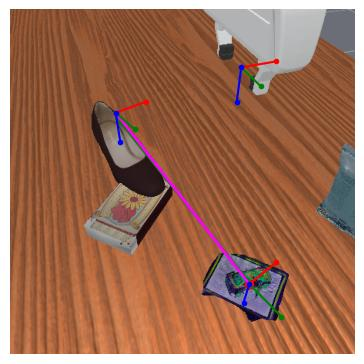
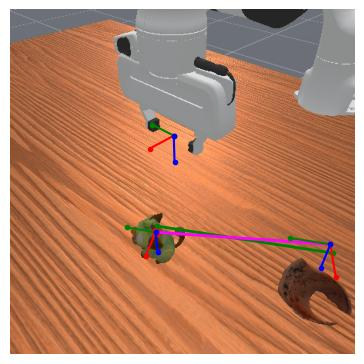
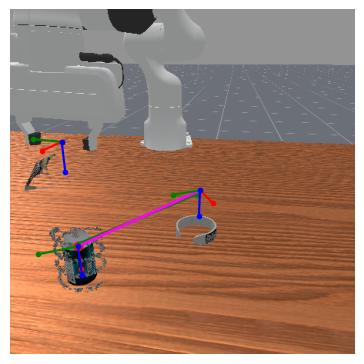
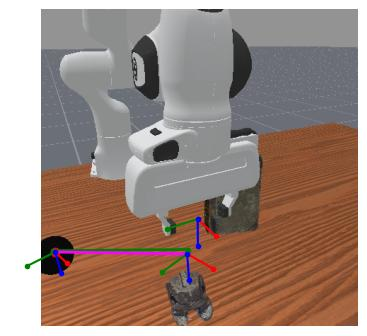
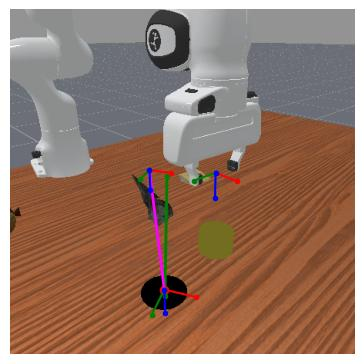
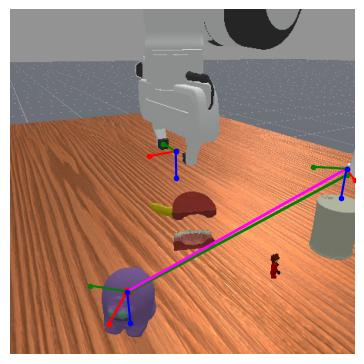
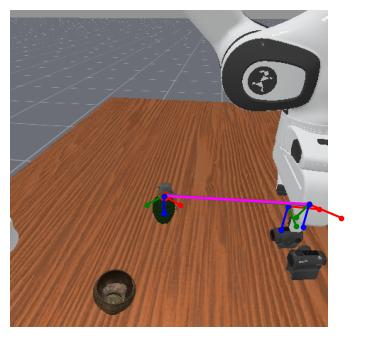
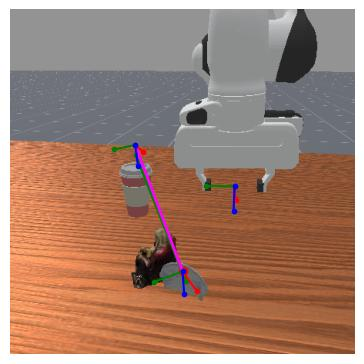
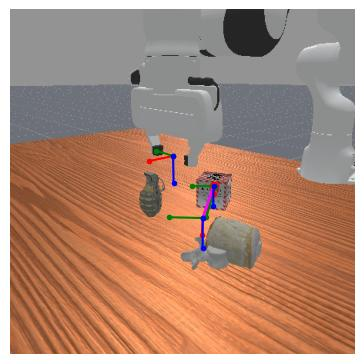
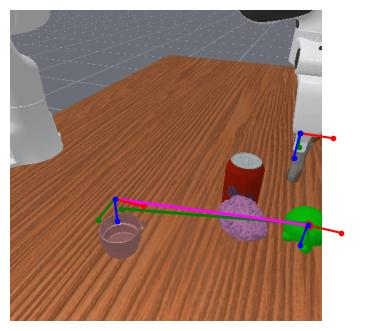
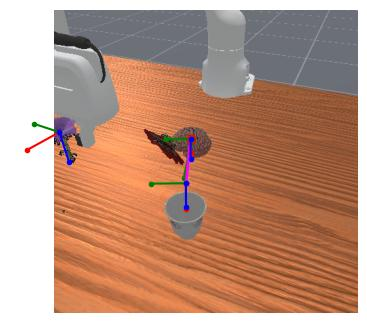
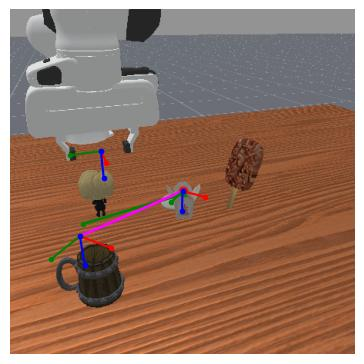
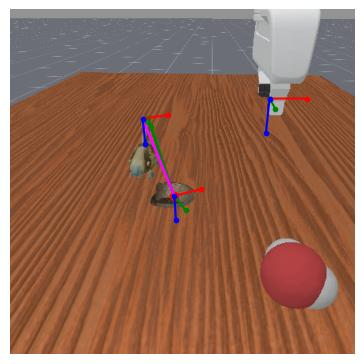
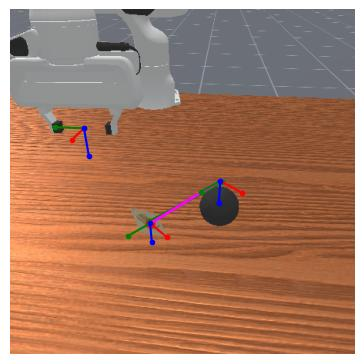
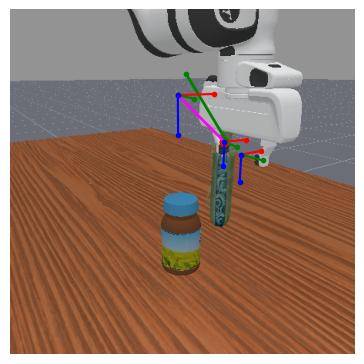
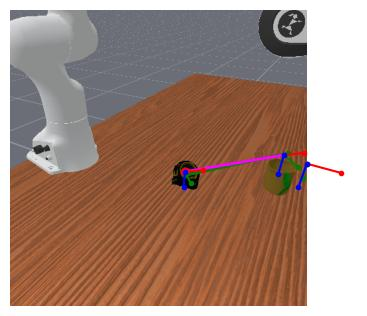

In [ ]:
display(HTML(visualized_imgs))

mix v9 clean - 38% 
mix v9 depth - 